<a href="https://colab.research.google.com/github/pradeep104203/DataStructures/blob/master/Project_Gnederclassification_Current_working_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
!ls

'aprilsix (1).apk'			 hw3_sol.pdf
 aprilsix.apk				 img016.jpg
 archive.zip				'LAB STATS USER LOGIN .gsheet'
 arlibrarytwo.apk			 Latestdata
'ARONE (1).apk'				 latestdataset.zip
 ARONE.apk				 Latestdata.zip
'ARONEe (1).apk'			'Lesson plan.gslides'
 ARONEe.apk				'Letter of Admission.pdf'
'ARTHREE (1).apk'			 m.apk
'ARTHREE (2).apk'			 mm.apk
'ARTHREE (3).apk'			 mmk.apk
 ARTHREE.apk				 model.png
 artwo.apk				 n.apk
 artwocspacevideo.apk			 new.apk
 artwocspacevideonew.apk		'newar (1).apk'
 artwoimage2.apk			 newar.apk
'artwovideoremoved (1).apk'		 Olddata
'artwovideoremoved (2).apk'		'resnet-50 model project au-sh.ipynb'
 artwovideoremoved.apk			 save_at_1.h5
 artwovulkan.apk			 save_at_2.h5
'Colab Notebooks'			 save_at_3.h5
 complete.apk				 save_at_4.h5
'Copy of 1. Language Fundamentals.pdf'	 test.apk
'Copy of fairfacedataset.zip'		 twentyoneapril.apk
 dataset.zip				 twentyoneaprilnew.apk
 fairfaceclahe.zip			 Untitled1.ipynb
 fairfacedataset.zip			'Untitled spreadsheet.gsheet'

In [ ]:
!unzip fairfacedataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: fairfacedataset/Validation/Female/9003.jpg  
  inflating: __MACOSX/fairfacedataset/Validation/Female/._9003.jpg  
  inflating: fairfacedataset/Validation/Female/3248.jpg  
  inflating: __MACOSX/fairfacedataset/Validation/Female/._3248.jpg  
  inflating: fairfacedataset/Validation/Female/6318.jpg  
  inflating: __MACOSX/fairfacedataset/Validation/Female/._6318.jpg  
  inflating: fairfacedataset/Validation/Female/10439.jpg  
  inflating: __MACOSX/fairfacedataset/Validation/Female/._10439.jpg  
  inflating: fairfacedataset/Validation/Female/3260.jpg  
  inflating: __MACOSX/fairfacedataset/Validation/Female/._3260.jpg  
  inflating: fairfacedataset/Validation/Female/4269.jpg  
  inflating: __MACOSX/fairfacedataset/Validation/Female/._4269.jpg  
  inflating: fairfacedataset/Validation/Female/3506.jpg  
  inflating: __MACOSX/fairfacedataset/Validation/Female/._3506.jpg  
  inflating: fairfacedataset/Validation/Female/5177.jpg  


In [ ]:
!unzip Latestdata.zip

unzip:  cannot find or open Latestdata.zip, Latestdata.zip.zip or Latestdata.zip.ZIP.


In [ ]:
cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
import os

num_skipped = 0
for folder_name in ("Training","Validation"):
    folder_path = os.path.join("fairfacedataset",folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd 
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
print(os.listdir('fairfacedataset'))
print(os.listdir('fairfacedataset/Training'))
print(os.listdir('fairfacedataset/Validation'))



['.DS_Store', 'Training', 'Validation']
['.DS_Store', 'Male', 'Female']
['.DS_Store', 'Male', 'Female', 'Feale']


In [ ]:
pip install keras

In [ ]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "fairfacedataset/Training",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "fairfacedataset/Training",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 85902 files belonging to 2 classes.
Using 68722 files for training.
Found 85902 files belonging to 2 classes.
Using 17180 files for validation.


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

NameError: ignored

<Figure size 720x720 with 0 Axes>

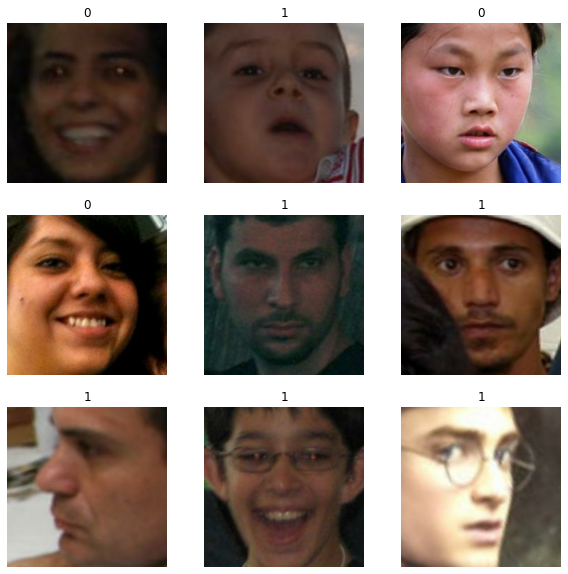

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

In [ ]:
from tensorflow import keras

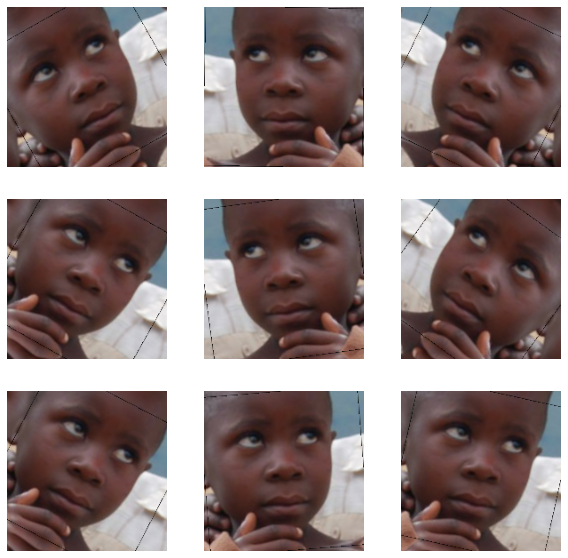

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

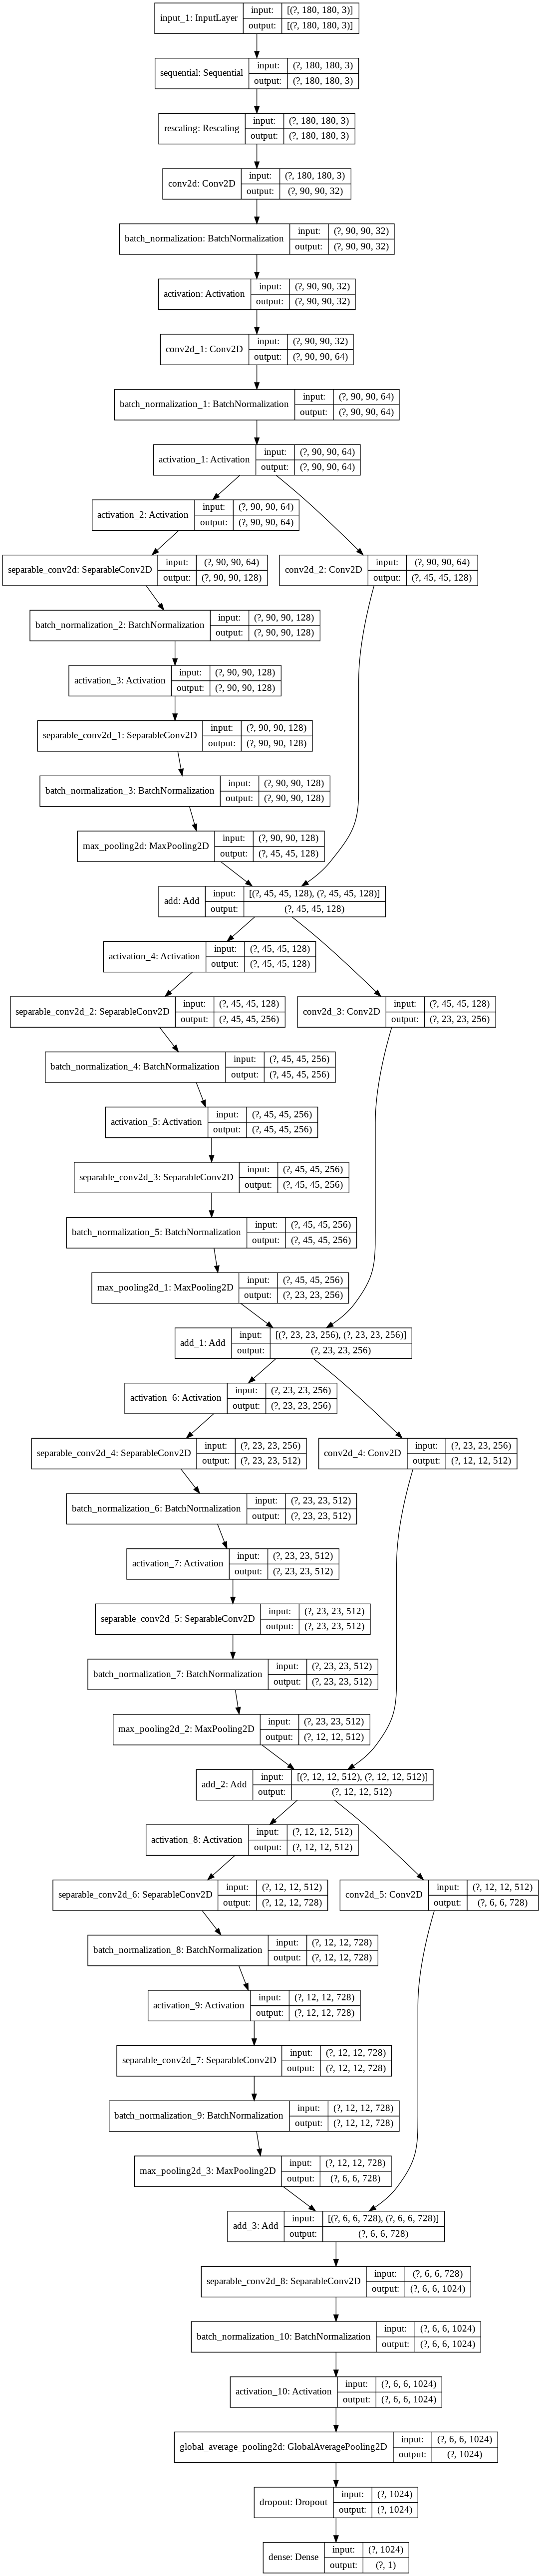

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 4

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/4
202/202 [==============================] - 1863s 9s/step - loss: 0.0168 - accuracy: 0.9929 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 2/4
202/202 [==============================] - 55s 273ms/step - loss: 2.2576e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/4
202/202 [==============================] - 57s 282ms/step - loss: 1.1138e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4/4
202/202 [==============================] - 57s 285ms/step - loss: 6.6734e-05 - accuracy: 1.0000 - val_loss: 7.5903e-05 - val_accuracy: 1.0000


In [ ]:
img = keras.preprocessing.image.load_img(
    "fairfacedataset/Validation/Female/86744.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent female and %.2f percent male."
    % (100 * (1 - score), 100 * score)
)

NameError: ignored

RESNET-50

In [ ]:

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random
import cv2
import os
from PIL import Image

from keras.layers import *
from keras.models import *
import keras


# Hyper - parameters

In [ ]:
# Hyper - parameters

epochs = 30
lr = 1e-3
batch_size = 64
#img_dims = (96,96,3)

data = []
labels = []

In [ ]:
size = 224

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
# CALLBACKS

from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

es = EarlyStopping(patience=5, monitor = 'val_accuracy')
rlp = ReduceLROnPlateau(patience=5, monitor = 'val_accuracy')

callbacks = [es, rlp]

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range = 0.4,
                                   height_shift_range = 0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale = 1./255
                                   )

test_gen = ImageDataGenerator(rescale = 1./255)

image_size = 224
batch_size = 64

train_generator = train_datagen.flow_from_directory(
        'fairfacedataset/Training',
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_gen.flow_from_directory(
    'fairfacedataset/Validation',
    target_size = (image_size, image_size),
    batch_size = batch_size,
    class_mode = 'binary'
)

num_classes = len(train_generator.class_indices)
print('Numer of classes:' ,num_classes)
print('Class labels: ', train_generator.class_indices)




"""
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (size, size),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size = (size, size),
    batch_size = batch_size, 
    class_mode = 'binary'
)

"""


Found 85902 images belonging to 2 classes.
Found 10836 images belonging to 2 classes.
Numer of classes: 2
Class labels:  {'Female': 0, 'Male': 1}


"\ntrain_datagen = ImageDataGenerator(\n    rescale = 1./255, \n    shear_range = 0.2, \n    zoom_range = 0.2,\n    horizontal_flip = True\n)\n\ntest_datagen = ImageDataGenerator(rescale = 1./255)\n\ntrain_generator = train_datagen.flow_from_directory(\n    train_path, \n    target_size = (size, size),\n    batch_size = batch_size,\n    class_mode = 'binary'\n)\n\nvalidation_generator = test_datagen.flow_from_directory(\n    valid_path,\n    target_size = (size, size),\n    batch_size = batch_size, \n    class_mode = 'binary'\n)\n\n"

In [ ]:
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)              

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_generator, steps_per_epoch = int(47000/64) + 1  , epochs = 30, validation_data = validation_generator, callbacks = callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
735/735 [==============================] - 665s 904ms/step - loss: 0.7349 - accuracy: 0.5326 - val_loss: 0.6853 - val_accuracy: 0.5656
Epoch 2/30
735/735 [==============================] - 625s 851ms/step - loss: 0.6990 - accuracy: 0.5509 - val_loss: 0.6897 - val_accuracy: 0.5584
Epoch 3/30
735/735 [==============================] - 625s 850ms/step - loss: 0.6937 - accuracy: 0.5553 - val_loss: 0.6861 - val_accuracy: 0.5838
Epoch 4/30
735/735 [==============================] - 626s 852ms/step - loss: 0.6928 - accuracy: 0.5584 - val_loss: 0.6958 - val_accuracy: 0.5692
Epoch 5/30
735/735 [==============================] - 623s 848ms/step - loss: 0.6869 - accuracy: 0.5631 - val_loss: 0.6743 - val_accuracy: 0.6002
Epoch 6/30
735/735 [==============================] - 618s 840ms/step - loss: 0.6870 - accuracy: 0.5682 - val_loss: 0.6575 - val_accuracy: 0.6166
Epoch 7/30
735/735 [============================

In [ ]:
model.save('model3.h5')

512 dense layers

In [ ]:
model.fit_generator(train_generator, steps_per_epoch = int(47000/64) + 1  , epochs = 30, validation_data = validation_generator, callbacks = callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
735/735 [==============================] - 671s 912ms/step - loss: 0.7160 - accuracy: 0.5355 - val_loss: 0.6732 - val_accuracy: 0.5939
Epoch 2/30
735/735 [==============================] - 669s 910ms/step - loss: 0.6911 - accuracy: 0.5514 - val_loss: 0.6746 - val_accuracy: 0.5832
Epoch 3/30
735/735 [==============================] - 669s 911ms/step - loss: 0.6890 - accuracy: 0.5543 - val_loss: 0.6704 - val_accuracy: 0.5774
Epoch 4/30
735/735 [==============================] - 663s 902ms/step - loss: 0.6852 - accuracy: 0.5639 - val_loss: 0.6652 - val_accuracy: 0.5946
Epoch 5/30
735/735 [==============================] - 665s 904ms/step - loss: 0.6837 - accuracy: 0.5662 - val_loss: 0.6562 - val_accuracy: 0.6100
Epoch 6/30
735/735 [==============================] - 663s 901ms/step - loss: 0.6819 - accuracy: 0.5710 - val_loss: 0.6802 - val_accuracy: 0.5975
Epoch 7/30
735/735 [============================

In [ ]:
model.save('model3.h5')

End of Resnet-50

Histogram Equalisation in OpenCV


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('space.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
plt.axis("off")
plt.imshow(res)
plt.show()

In [ ]:
import cv2
import numpy as np
import os

for 
img = cv2.imread('tsukuba_1.png', 0)

# Create a CLAHE object (Arguments are optional)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
cll = clahe.apply(img)

#Normal Equalisation
equ = cv2.equalizeHist(img)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(equ,cmap = 'gray')
plt.title('Normal histogram equalization'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(cll,cmap = 'gray')
plt.title('CLAHE'), plt.xticks([]), plt.yticks([])
plt.show()
